In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from generator_utils import potential
from generator_utils import generate_temporal_network
from generator_utils import save_temporal_network

### PARAMETERS

Set parameters for the generator. Parameters determining wells depth, position and width are set as follows:

```python
c = [[c_11, c_12, ..., c_1(w1)],
    [c_21, c_22, ..., c_2(w2)],
    ...
    [c_s1, c_s2, ..., c_s(ws)]]
```
Where `c_ji` is the depth of `i`th well in the `j`th phase. In total, there are $s$ phases and $j$- th phase has $w_j$ wells. Similarly we set parameters `p,q,m,n`. Corrective parameters $a$ and $b$ are constant within each phase so we set them as 

```python
a = [a_1, a_2, ..., a_s]
b = [b_1, b_2, ..., b_s]
``` 
for the total of $s$ phases.

In `durations` parameter we set the duration of each phase. For example, if simulation takes in total 1000 steps, and we want to implement 3 phases of durations 300, 450 and 250 respectively, we set 

```python
durations = [300, 450]
```
Note that the length of `durations` parameter is one less than the total number of phases because algorithm calculates the duration of the last phase. 

In [13]:
# ----------------------- EDIT HERE ----------------------------

n_particles = 100

# Particles starting positions 
start_pos = np.random.uniform(-2, 2, (n_particles, 2))

# Parameters for gradient search 
dt = 0.05
beta = 0.75
T = 10
alpha = 3

# Resolution parameter r  
frequency = 10

# Potential function parameters
c = [[-5, -5, 2], 
     [-5, -5, -5, 2],
     [-5, -5, -5, -5, 2]]   
 
p = [[2.5, -2.5, 0],
     [-2.5, 1.5, 1.5, 0],
     [1.5, 1.5, -2, -2, 0]]

q = [[0, 0, 0],
     [0, 1.2, -1.2, 0],
     [1.2, -1.2, -1.8, 1.8, 0]]

m = [[1, 1, 1],
     [1, 0.5, 0.5, 1],
     [0.5, 0.5, 0.7, 0.7, 1]]

n = [[1, 1, 0],
     [1, 1, 1, 0], 
     [1, 1, 0.7, 0.7, 0]]

# Corrective parameters
a = [0.04, 0.04, 0.04]
b = [0.04, 0.04, 0.04]

# Evaluation function parameters
nu = 1
theta = 15
omega = 22
xi = 1

# Set this to ensure that each node is connected to at least min_degree 
# other nodes - spatially close nodes are preferred
min_degree = 50

# Duration of phases
# List of length J-1 (J - total number of phases)
# Example: durations = [100, 150] means that Phase 1 lasts for the first 100 simulation steps, 
#          Phase 2 for the next 150 simulation steps and Phase 3 until the end of the simulation
durations = [70, 70]
# ----------------------- STOP EDIT ----------------------------

params = [n_particles, start_pos, dt, beta, T, alpha, frequency, c, p, q, m, n, a, b, nu, theta, omega, xi, min_degree, durations]

Plot evaluation function

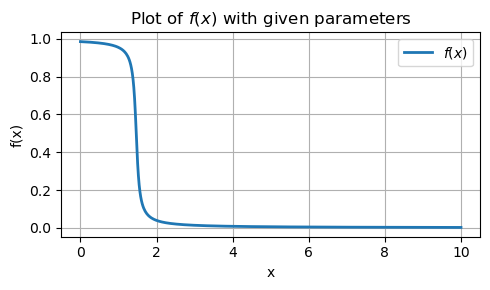

In [14]:
def f(x, xi, nu, theta, omega):
    return 1 - xi * (1 - nu * (-1/np.pi * np.arctan(theta * x - omega) + 0.5))

# Generate x values
x_vals = np.linspace(0, 10, 500)

# Compute y values
y_vals = f(x_vals, xi, nu, theta, omega)

# Plot
plt.figure(figsize=(5, 3))
plt.plot(x_vals, y_vals, label=r'$f(x)$', linewidth=2)
plt.title('Plot of $f(x)$ with given parameters')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Plot potentials for all phases. Make sure that `plot_rows` and `plot_cols` are big enough to accomodate all the plots.

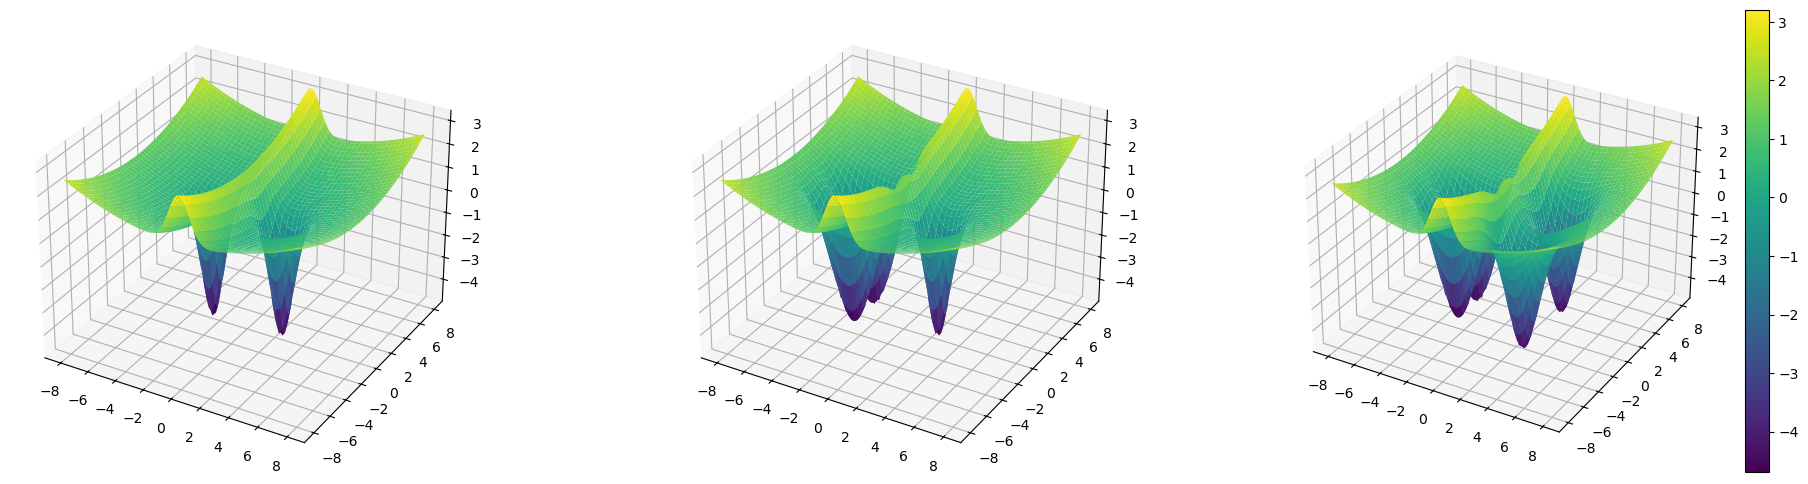

In [3]:
# ----------------------- EDIT HERE ----------------------------
# Plotting parameters
plot_rows = 1
plot_cols = 3
# Aspect ratio
plot_width = 8
plot_height = 6
# ----------------------- STOP EDIT ----------------------------

# Create mesh 
X = np.linspace(-8, 8, 100)  # X values
Y = np.linspace(-8, 8, 100)  # Y values
X, Y = np.meshgrid(X, Y)

phases_number = len(c)
fig, ax = plt.subplots(plot_rows, plot_cols, figsize=(plot_width*plot_cols, plot_height*plot_rows), subplot_kw={'projection': '3d'})
for phase in range(phases_number):
    Z = potential(X, Y, c[phase], p[phase], q[phase], m[phase], n[phase], a[phase], b[phase])
    surface = ax.flat[phase].plot_surface(X, Y, Z, cmap='viridis')

colorbar = fig.colorbar(surface)


### Generate temporal network

In [4]:
vertices, edges, adj_matrices, labels = generate_temporal_network(params)

### Save temporal network
Temporal networks are saved in directory `temporal_networks`

Content:
- parameters.txt - list of parameters used to generate the network
- ver - directory containing positions of nodes in the plane for each snapshot
- edg - directory containing lists of edges for each snapshot
- adj - directory containing adjacency matrices for each snapshot
- labels.csv - ground truth snapshot labels

In [5]:
# ----------------------- EDIT HERE ----------------------------
temporal_network_name = 'temporal_1'
# ----------------------- STOP EDIT ----------------------------

save_temporal_network(temporal_network_name, params, vertices, edges, adj_matrices, labels)

Parameters saved to ./temporal_networks/temporal_1/parameters.txt
